In [1]:
from fenics import (plot,DirichletBC,TrialFunction,TestFunction,dot,
                    grad,dx,Function,solve,Expression,FunctionSpace,
                    UnitSquareMesh,File,errornorm,Point,interpolate)
from mshr import Circle, generate_mesh
import numpy as np
import matplotlib.pyplot as plt

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [2]:
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 3)
beta = 8
R0 = 0.6

In [3]:
u_D = Expression('sin(x[0])*sin(2*x[1])', degree=5)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',degree=1, beta=beta, R0=R0)

w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx
w = Function(V)
solve(a == L, w, bc)

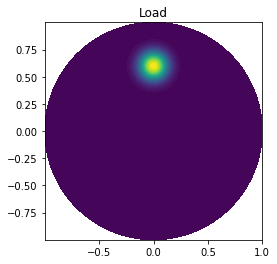

In [4]:
#plot(w, title='Deflection')
p2 = interpolate(p, V)
plot(p2, title='Load')

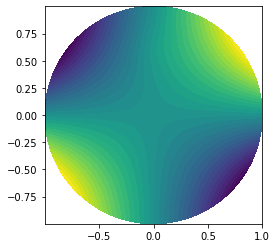

In [6]:
plot(w)

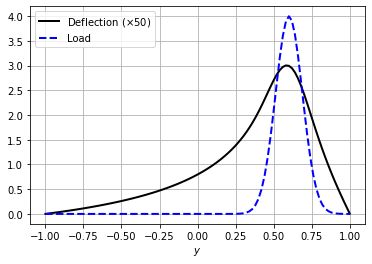

In [5]:
tol = 0.001 # avoid hitting points outside the domain
y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y] # 2D points
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
    
plt.plot(y, 50*w_line, 'k', linewidth=2) # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')
#plt.savefig('poisson_membrane/curves.pdf')
#plt.savefig('poisson_membrane/curves.png')
plt.show()